In [1]:
import os
import json

import torch
import matplotlib.pyplot as plt
import pandas as pd

import tqdm

from model import FRCNNDetector, DetectedImage
import dataset as DS

In [2]:
classes = ['1', '2', '3', '4', '5', 'blue', 'brown', 'green', 'red', 'yellow', 'parking', 'limit_h', 'limit_speed' ,'14', '15']
# model_path = "./saved_models/fasterrcnn_20231119.pt-35"
model_path = "./saved_models/frcnn.pth"

detector = FRCNNDetector(classes, model_path=model_path)

In [3]:
data_set_path = "./all_data/val"
# test_loader = DS.load_dataset(data_set_path, "target_2048_2448.json")
test_loader = DS.load_dataset(data_set_path, "target_2452_2056.json", batch_size=6)

In [4]:
gts = []
predicts = []
count = 0
with torch.no_grad():
    detector.eval()
    for images, targets in tqdm.tqdm(test_loader):

        for target in targets:
            n_boxes = len(target["boxes"])
            target["scores"] = torch.Tensor([1.]*n_boxes)
        gts.extend(
            [DetectedImage(image, out, classes=classes) for image, out in zip(images, targets)]
        )

        # result = detector(images)
        predicts.extend(detector.predict(images))
        # print(detector(images))
        
        count += 1
        if count==3:
            break
        

  6%|▋         | 2/31 [00:37<09:00, 18.64s/it]


In [5]:
check_idx = 3

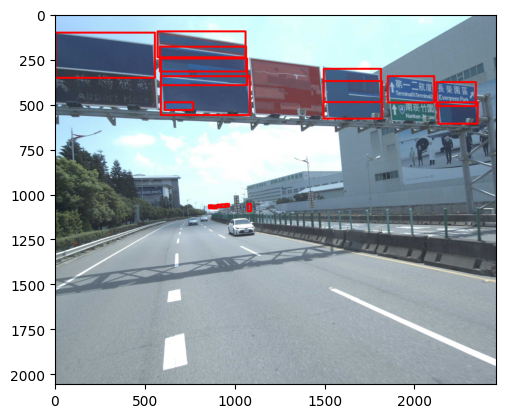

In [6]:
detected_image = predicts[check_idx]
img = detected_image.draw_box("blue", thickness=10, score_thr=.7)
plt.imshow(img)

In [7]:
small_figs = detected_image.fetch("blue")
small_figs

[DetectedInstance(bbox=x0     588
 y0     345
 x1    1083
 y1     561
 Name: 0, dtype: object, category='blue', score=0.999653697013855, _ref_image=tensor([[[167., 166., 164.,  ..., 117., 117., 117.],
          [167., 166., 164.,  ..., 117., 117., 117.],
          [167., 166., 164.,  ..., 117., 117., 117.],
          ...,
          [140., 141., 141.,  ..., 152., 152., 152.],
          [139., 139., 140.,  ..., 154., 154., 154.],
          [138., 139., 140.,  ..., 154., 154., 154.]],
 
         [[210., 209., 207.,  ..., 136., 136., 136.],
          [210., 209., 207.,  ..., 136., 136., 136.],
          [210., 209., 207.,  ..., 136., 136., 136.],
          ...,
          [151., 152., 152.,  ..., 163., 163., 163.],
          [150., 150., 151.,  ..., 165., 165., 165.],
          [149., 150., 151.,  ..., 165., 165., 165.]],
 
         [[255., 254., 252.,  ..., 151., 151., 151.],
          [255., 254., 252.,  ..., 151., 151., 151.],
          [255., 254., 252.,  ..., 151., 151., 151.],
       

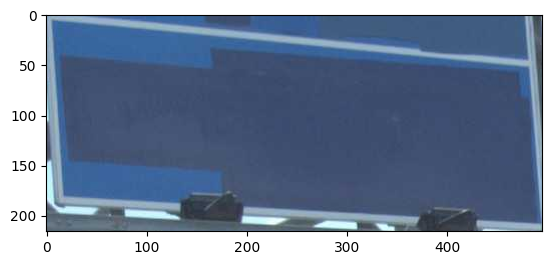

In [8]:
detected_instance = small_figs[0]
the_real_small_fig = detected_instance.image
plt.imshow(the_real_small_fig)

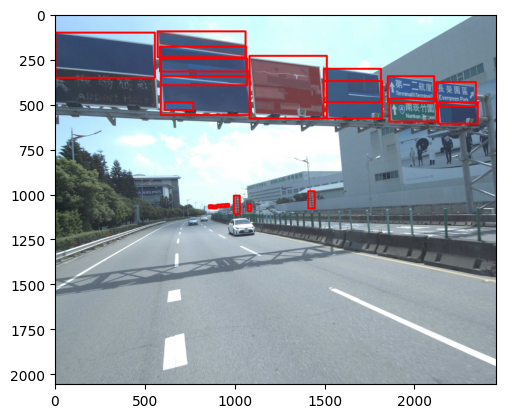

In [9]:
detected_image = predicts[check_idx]
img = detected_image.draw_all_box(thickness=10, score_thr=.7)
plt.imshow(img)

,label,score,x0,y0,x1,y1
0,blue,1.0,854,1063,876,1079
1,blue,1.0,877,1061,900,1077
2,red,1.0,877,1056,898,1062
3,blue,1.0,902,1058,923,1067
4,blue,1.0,902,1066,923,1075
5,blue,1.0,925,1056,945,1075
6,blue,1.0,948,1055,968,1064
7,green,1.0,948,1062,969,1072
8,brown,1.0,994,1008,1030,1114
9,blue,1.0,1072,1054,1088,1092


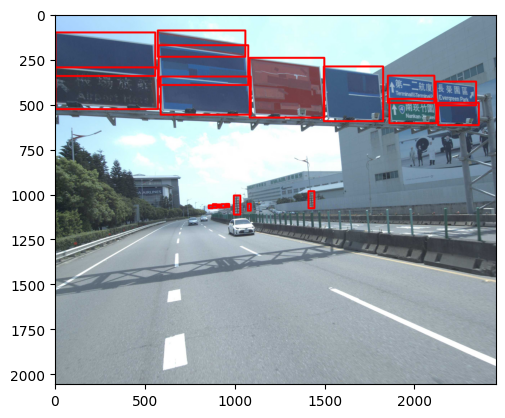

In [10]:
detected_image = gts[check_idx]
img = detected_image.draw_all_box(thickness=10, score_thr=.7)
plt.imshow(img)
detected_image._info

In [11]:
assert False

AssertionError: 

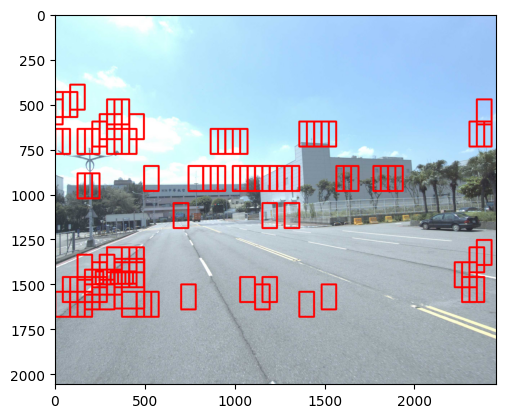

In [ ]:
detected_image = predicts[1]
img = detected_image.draw_box("green", thickness=10, score_thr=.7)
plt.imshow(img)

In [ ]:
detected_image._info

,label,score,x0,y0,x1,y1
0,green,0.922982,1646,392,1728,531
1,green,0.922802,1153,556,1234,695
2,green,0.92278,1194,515,1275,654
3,green,0.922767,1317,474,1399,613
4,green,0.922752,1605,392,1687,531
...,...,...,...,...,...,...
95,green,0.86274,1811,844,1892,983
96,green,0.861244,1112,638,1193,777
97,green,0.860222,1194,597,1275,736
98,green,0.860103,1482,392,1563,531


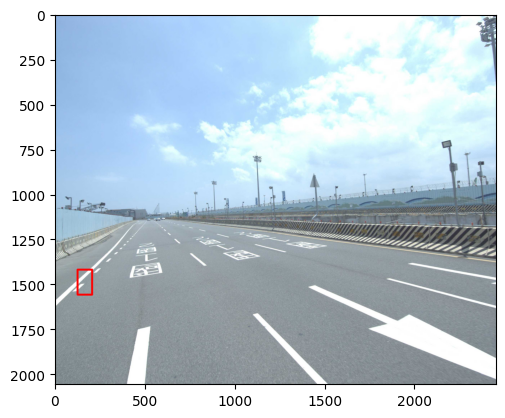

In [ ]:
tmp = detected_image.nms_filtering(.1)
img = tmp.draw_box("blue", thickness=10, score_thr=.7)
plt.imshow(img)

140674809952672
140674809952672


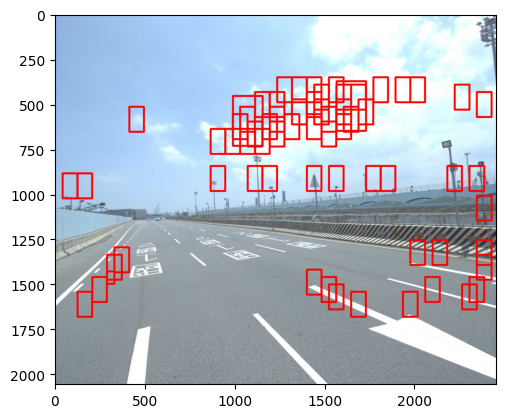

In [ ]:
tmp = detected_image.nms_filtering(.3)
print(id(tmp._ref_image))
print(id(detected_image._ref_image))
img = tmp.draw_box("green", thickness=10, score_thr=.7)
plt.imshow(img)

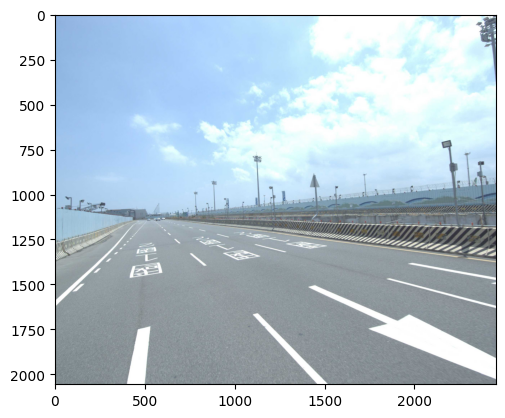

In [ ]:
img = gts[0].draw_box("green", thickness=10)
plt.imshow(img)